# Extracting Noun Phrases

In [1]:
#Import libraries
# import nltk
from textblob import TextBlob
#Extract noun
blob = TextBlob("John is learning natural language processing")
for np in blob.noun_phrases:
    print(np)

john
natural language processing


In [2]:
blob.noun_phrases

WordList(['john', 'natural language processing'])

# Finding Similarity Between Texts

In [ ]:
# The simplest way to do this is by using cosine similarity from the sklearn library.

In [2]:
documents = (
"I like NLP",
"I am exploring NLP",
"I am a beginner in NLP",
"I want to learn NLP",
"I like advanced NLP" )

In [3]:
#Import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
#Compute tfidf : feature engineering
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_matrix.shape

(5, 10)

In [4]:
#compute similarity for first sentence with rest of the sentences

# If we clearly observe, the first sentence and last sentence have higher similarity compared to the rest of the sentences.
cosine_similarity(tfidf_matrix[0:1],tfidf_matrix)

array([[1.        , 0.17682765, 0.14284054, 0.13489366, 0.68374784]])

In [7]:
cosine_similarity(tfidf_matrix[1:2],tfidf_matrix)

array([[0.17682765, 1.        , 0.37765328, 0.09223325, 0.12090552]])

In [ ]:
# Phonetic matching

In [2]:
!pip install fuzzy
import fuzzy

  Created wheel for fuzzy: filename=Fuzzy-1.2.2-cp39-cp39-win_amd64.whl size=38936 sha256=c26040dcb05f154a32ae1414f1444cf657ab6e10911068b0cfccd7bc2809ae16
  Stored in directory: c:\users\pooya\appdata\local\pip\cache\wheels\cd\72\5c\3baf339199d883de942158b8759f447b8ecf14e4ec522294b4
Successfully built fuzzy


In [3]:
# Run the Soundex function
soundex = fuzzy.Soundex(4)

In [4]:
soundex('natural')  , soundex('Natural') ,  soundex('Learning')

('N364', 'N364', 'L652')

# Tagging Part of Speech 

In [9]:
text = "I love NLP and I will learn NLP in 2 month"

In [12]:
# Importing necessary packages and stopwords
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
stop_words = set(stopwords.words('english'))
# Tokenize the text
tokens = sent_tokenize(text)
#Generate tagging for all the tokens using loop
for i in tokens:
    words = nltk.word_tokenize(i)
    words = [w for w in words if not w in stop_words]
# POS-tagger.
tags = nltk.pos_tag(words)
tags

[('I', 'PRP'),
 ('love', 'VBP'),
 ('NLP', 'NNP'),
 ('I', 'PRP'),
 ('learn', 'VBP'),
 ('NLP', 'RB'),
 ('2', 'CD'),
 ('month', 'NN')]

# Named Entity Recognition

In [19]:
# !pip install svgling


In [20]:
import nltk
from nltk import ne_chunk
from nltk import word_tokenize

sent = "John is studying at Stanford University in California"

In [21]:
word_tokenize(sent)

['John', 'is', 'studying', 'at', 'Stanford', 'University', 'in', 'California']

In [22]:
nltk.pos_tag(word_tokenize(sent))

[('John', 'NNP'),
 ('is', 'VBZ'),
 ('studying', 'VBG'),
 ('at', 'IN'),
 ('Stanford', 'NNP'),
 ('University', 'NNP'),
 ('in', 'IN'),
 ('California', 'NNP')]

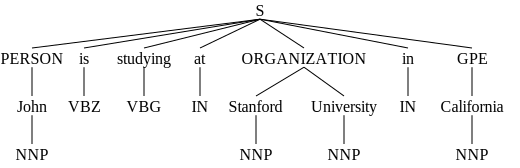

In [23]:
ne_chunk(nltk.pos_tag(word_tokenize(sent)), binary=False)

In [28]:
# Using SpaCy


In [35]:
# !pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz


In [38]:
import spacy
nlp = spacy.load('en')
# Read/create a sentence
doc = nlp(u'Apple is ready to launch new phone worth $10000 in
New york time square ')
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)
#output
# Apple 0 5 ORG
# 10000 42 47 MONEY
# New york 51 59 GPE

# Extracting Topics from Text

In [ ]:
# identify topics within documents using genism.

In [99]:
# !pip install gensim
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [100]:
doc1 = "I am learning NLP, it is very interesting and exciting. it includes machine learning and deep learning"
doc2 = "My father is a data scientist and he is nlp expert"
doc3 = "My sister has good exposure into android development"

In [101]:
doc_complete = [doc1, doc2, doc3]
doc_complete

['I am learning NLP, it is very interesting and exciting. it includes machine learning and deep learning',
 'My father is a data scientist and he is nlp expert',
 'My sister has good exposure into android development']

In [102]:
# Text preprocessing
stop = set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [103]:
def clean(doc):
    stop_free = ' '.join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = ' '.join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [104]:
doc_clean = [clean(doc).split() for doc in doc_complete]
doc_clean

[['learning',
  'nlp',
  'interesting',
  'exciting',
  'includes',
  'machine',
  'learning',
  'deep',
  'learning'],
 ['father', 'data', 'scientist', 'nlp', 'expert'],
 ['sister', 'good', 'exposure', 'android', 'development']]

In [ ]:
# Preparing document term matrix

In [112]:
# Importing gensim
import gensim
from gensim import corpora
# Creating the term dictionary of our corpus, where every unique term is assigned an index.
dictionary = corpora.Dictionary(doc_clean)

list(dictionary.items())

[(0, 'deep'),
 (1, 'exciting'),
 (2, 'includes'),
 (3, 'interesting'),
 (4, 'learning'),
 (5, 'machine'),
 (6, 'nlp'),
 (7, 'data'),
 (8, 'expert'),
 (9, 'father'),
 (10, 'scientist'),
 (11, 'android'),
 (12, 'development'),
 (13, 'exposure'),
 (14, 'good'),
 (15, 'sister')]

In [113]:
# Converting a list of documents (corpus) into Document-Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]   # doc2bow : Convert document into the bag-of-words (BoW) format = list of (token_id, token_count) tuples.
doc_term_matrix

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 3), (5, 1), (6, 1)],
 [(6, 1), (7, 1), (8, 1), (9, 1), (10, 1)],
 [(11, 1), (12, 1), (13, 1), (14, 1), (15, 1)]]

In [ ]:
# create the LDA model

In [114]:
# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel
# Running and Training LDA model on the document term matrix for 3 topics.
ldamodel = Lda(doc_term_matrix, num_topics=3, id2word = dictionary, passes=50)
# Results
print(ldamodel.print_topics())

[(0, '0.063*"nlp" + 0.063*"father" + 0.063*"data" + 0.063*"scientist" + 0.063*"expert" + 0.063*"exposure" + 0.063*"development" + 0.063*"good" + 0.063*"android" + 0.063*"sister"'), (1, '0.087*"sister" + 0.087*"good" + 0.087*"development" + 0.087*"android" + 0.087*"exposure" + 0.087*"father" + 0.087*"scientist" + 0.087*"data" + 0.087*"expert" + 0.087*"nlp"'), (2, '0.232*"learning" + 0.093*"nlp" + 0.093*"deep" + 0.093*"includes" + 0.093*"interesting" + 0.093*"machine" + 0.093*"exciting" + 0.023*"scientist" + 0.023*"expert" + 0.023*"father"')]


In [ ]:
# All the weights associated with the topics from the sentence seem
# almost similar. You can perform this on huge data to extract significant
# topics.

# Classifying Text

In [119]:
# Spam - ham classification using machine learning

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import os
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import sklearn.feature_extraction.text as text
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm


In [131]:
#Read the data
Email_Data = pd.read_csv("spam.csv",encoding ='latin1')

In [132]:
#Data undestanding
Email_Data.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [133]:
Email_Data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [134]:
Email_Data = Email_Data[['v1', 'v2']]
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"})

In [135]:
Email_Data.head(5)

,Target,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [136]:
# Text processing and feature engineering

#pre processing steps like lower case, stemming and lemmatization



In [137]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:" ".join(x.lower() for x in x.split()))
Email_Data.head(5)

,Target,Email
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


In [138]:
stop = stopwords.words('english')
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
Email_Data.head(5)

,Target,Email
0,ham,"go jurong point, crazy.. available bugis n gre..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say early hor... u c already say...
4,ham,"nah think goes usf, lives around though"


In [139]:
st = PorterStemmer()
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
Email_Data.head(5)

,Target,Email
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


In [140]:
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Email_Data.head(5)

,Target,Email
0,ham,"go jurong point, crazy.. avail bugi n great wo..."
1,ham,ok lar... joke wif u oni...
2,spam,free entri 2 wkli comp win fa cup final tkt 21...
3,ham,u dun say earli hor... u c alreadi say...
4,ham,"nah think goe usf, live around though"


In [142]:
#Splitting data into train and validation
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(Email_Data['Email'], Email_Data['Target'])

In [143]:
# TFIDF feature generation for a maximum of 5000 features
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)
valid_y

array([0, 0, 0, ..., 0, 1, 0])

In [144]:
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(Email_Data['Email'])
xtrain_tfidf = tfidf_vect.transform(train_x)
xvalid_tfidf = tfidf_vect.transform(valid_x)
xtrain_tfidf.data

array([0.52252739, 0.36420907, 0.35149393, ..., 0.32943488, 0.72333291,
       0.69049945])

In [147]:
xtrain_tfidf

<4179x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 38319 stored elements in Compressed Sparse Row format>

In [148]:
# Model training

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    return metrics.accuracy_score(predictions, valid_y)


# Naive Bayes trainig
accuracy = train_model(naive_bayes.MultinomialNB(alpha=0.2), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9877961234745154


In [149]:
# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print ("Accuracy: ", accuracy)

Accuracy:  0.9605168700646087


In [ ]:
# Naive Bayes is giving better results than the linear classifier. We can try
# many more classifiers and then choose the best one.

# Carrying Out Sentiment Analysis

In [152]:
# Create the sample data

review = "I like this phone. screen quality and camera clarity is really good."
review2 = "This tv is not good. Bad quality, no clarity, worst experience"

In [153]:
# Cleaning and preprocessing

# Using a pretrained model from TextBlob to get the sentiment scores:
from textblob import TextBlob
#TextBlob has a pre trained sentiment prediction model
blob = TextBlob(review)
blob.sentiment


Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

In [154]:
#now lets look at the sentiment of review2
blob = TextBlob(review2)
blob.sentiment

Sentiment(polarity=-0.6833333333333332, subjectivity=0.7555555555555555)

In [ ]:
# This is a negative review, as the polarity is “-0.68.”


# Disambiguating Text

In [156]:
# !pip install pywsd


In [157]:
from nltk.corpus import wordnet as wn
from nltk.stem import PorterStemmer
from itertools import chain
from pywsd.lesk import simple_lesk

Warming up PyWSD (takes ~10 secs)... took 2.7372796535491943 secs.


In [160]:
bank_sents = ['I went to the bank to deposit my money','The river bank was full of dead fishes']

# calling the lesk function and printing results for both the sentences
print ("Context-1:", bank_sents[0])
answer = simple_lesk(bank_sents[0],'bank')
print ("Sense:", answer)
print ("Definition : ", answer.definition())


Context-1: I went to the bank to deposit my money
Sense: Synset('depository_financial_institution.n.01')
Definition :  a financial institution that accepts deposits and channels the money into lending activities


In [161]:
print ("Context-2:", bank_sents[1])
answer = simple_lesk(bank_sents[1],'bank','n')
print ("Sense:", answer)
print ("Definition : ", answer.definition())

Context-2: The river bank was full of dead fishes
Sense: Synset('bank.n.01')
Definition :  sloping land (especially the slope beside a body of water)


# Converting Speech to Text

In [163]:
# Converting speech to text is a very useful NLP technique.

#!pip install SpeechRecognition
#!pip install PyAudio
import speech_recognition as sr

In [172]:
# whatever you say on the microphone (using recognize_google function) gets converted into text.
r=sr.Recognizer()

with sr.Microphone() as source:
    print("Please say something")
    audio = r.listen(source)
    print("Time over, thanks")

try:
    print("I think you said: " + r.recognize_google(audio));
except:
    pass;

Please say something
Time over, thanks
result2:
{   'alternative': [   {   'confidence': 0.95467669,
                           'transcript': 'speech recognition'}],
    'final': True}
I think you said: speech recognition


In [174]:
#code snippet
r=sr.Recognizer()
with sr.Microphone() as source:
    print("Please say something")
    audio = r.listen(source)
print("Time over, thanks")
try:
    print("I think you said: "+r.recognize_google(audio, language ='de-DE'));
except sr.UnknownValueError:
    print("Google Speech Recognition could not understand audio")
except sr.RequestError as e:
    print("Could not request results from Google Speech Recognition service; {0}".format(e))
except:
    pass;

Please say something
Time over, thanks
result2:
{   'alternative': [   {   'confidence': 0.89485103,
                           'transcript': 'hallo wie geht es dir'},
                       {'transcript': 'Hallo wie geht es dir'}],
    'final': True}
I think you said: hallo wie geht es dir


# Converting Text to Speech

In [192]:
# !pip install gTTS
from gtts import gTTS

In [210]:
text = 'Natural language processing (NLP) is an interdisciplinary subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. The goal is a computer capable of "understanding" the contents of documents, including the contextual nuances of the language within them. The technology can then accurately extract information and insights contained in the documents as well as categorize and organize the documents themselves.'

In [211]:
#chooses the language, English('en')
convert = gTTS(text=text, lang='en', slow=False)
# Saving the converted audio in a mp3 file named
convert.save("audio.mp3")

In [201]:
import gtts
gtts.lang.tts_langs()

{'af': 'Afrikaans',
 'ar': 'Arabic',
 'bg': 'Bulgarian',
 'bn': 'Bengali',
 'bs': 'Bosnian',
 'ca': 'Catalan',
 'cs': 'Czech',
 'da': 'Danish',
 'de': 'German',
 'el': 'Greek',
 'en': 'English',
 'es': 'Spanish',
 'et': 'Estonian',
 'fi': 'Finnish',
 'fr': 'French',
 'gu': 'Gujarati',
 'hi': 'Hindi',
 'hr': 'Croatian',
 'hu': 'Hungarian',
 'id': 'Indonesian',
 'is': 'Icelandic',
 'it': 'Italian',
 'iw': 'Hebrew',
 'ja': 'Japanese',
 'jw': 'Javanese',
 'km': 'Khmer',
 'kn': 'Kannada',
 'ko': 'Korean',
 'la': 'Latin',
 'lv': 'Latvian',
 'ml': 'Malayalam',
 'mr': 'Marathi',
 'ms': 'Malay',
 'my': 'Myanmar (Burmese)',
 'ne': 'Nepali',
 'nl': 'Dutch',
 'no': 'Norwegian',
 'pl': 'Polish',
 'pt': 'Portuguese',
 'ro': 'Romanian',
 'ru': 'Russian',
 'si': 'Sinhala',
 'sk': 'Slovak',
 'sq': 'Albanian',
 'sr': 'Serbian',
 'su': 'Sundanese',
 'sv': 'Swedish',
 'sw': 'Swahili',
 'ta': 'Tamil',
 'te': 'Telugu',
 'th': 'Thai',
 'tl': 'Filipino',
 'tr': 'Turkish',
 'uk': 'Ukrainian',
 'ur': 'Urdu',
 '

In [206]:
text = 'In der Computerlinguistik (CL) oder linguistischen Datenverarbeitung (LDV) wird untersucht, wie natürliche Sprache in Form von Text- oder Sprachdaten mit Hilfe des Computers algorithmisch verarbeitet werden kann. Sie ist Schnittstelle zwischen Sprachwissenschaft und Informatik. In der englischsprachigen Literatur und Informatik ist neben dem Begriff natural language processing (NLP) auch computational linguistics (CL) gebräuchlich.'

In [207]:
#chooses the language, English('en')
convert = gTTS(text=text, lang='de' ,slow=False)
# Saving the converted audio in a mp3 file named
convert.save("audio.mp3")

# Translating Speech

In [213]:
import goslate

In [214]:
text = "Bonjour le monde"
gs = goslate.Goslate()
translatedText = gs.translate(text,'en')
print(translatedText)

Hi world
